<a href="https://colab.research.google.com/github/fikatriana/Pemograman_Python/blob/main/pertemuan%2013_gambar%20kurva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
      Ca=46.3
      Cb=33.9

    if tipe=='urban' :
      Cm=0
    elif tipe=='suburban' :
      Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
      Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
      Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm

    return Lp

In [3]:
f=1800 #MHz
f1=700 #MHz
f2=900 #MHz
loc='urban'
loc2='open'
loc3='suburban'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [4]:
LpUrban=cos(f,loc,tower,user,d)
LpUrban2=cos(f,loc2,tower,user,d)
LpUrban3=cos(f,loc3,tower,user,d)

In [5]:
d_sort=d[np.argsort(d)]
Urban_sort=LpUrban[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]

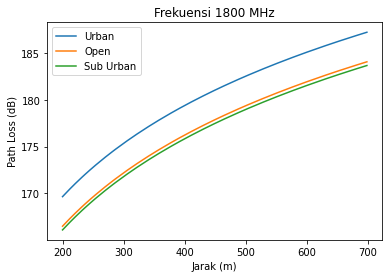

In [6]:
plt.figure()
plt.plot(d_sort,Urban_sort, label='Urban')
plt.plot(d_sort,Urban2_sort, label='Open')
plt.plot(d_sort,Urban3_sort, label='Sub Urban')
plt.legend()
plt.title('Frekuensi 1800 MHz')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()

In [7]:
Frek1=cos(f1,loc,tower,user,d)
Frek2=cos(f2,loc,tower,user,d)
Frek3=cos(f,loc,tower,user,d)

In [8]:
d_sort=d[np.argsort(d)]
ModUr_sort=Frek1[np.argsort(d)]
ModUr2_sort=Frek2[np.argsort(d)]
ModUr3_sort=Frek3[np.argsort(d)]

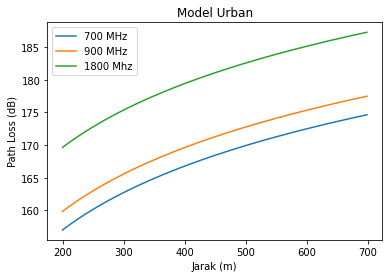

In [9]:
plt.figure()
plt.plot(d_sort,ModUr_sort, label='700 MHz')
plt.plot(d_sort,ModUr2_sort, label='900 MHz')
plt.plot(d_sort,ModUr3_sort, label='1800 Mhz')
plt.legend()
plt.title('Model Urban')
plt.xlabel('Jarak (m)')
plt.ylabel('Path Loss (dB)')
plt.show()